In [1]:
import os
import sys
sys.path.append('../../')
from lib.env.global_var import *
from lib.func.shelve_store import *
sys.path.remove('../../')
import statsmodels
import copy

In [2]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
%run -i financial_sector_ret_space.py

In [4]:
for csv_name in csv_name_list:
    var_name = csv_name.split(".")[0]
    exec("freq = pd.infer_freq("+var_name+".index)")
    print(var_name,freq)

('CPI', 'QS-OCT')
('GDP', 'QS-OCT')
('DGS10', None)
('HPI', 'MS')
('PAYEMS', 'MS')
('TEDRATE', None)
('FEDFUNDS', 'MS')
('NETEXP', 'QS-OCT')
('PCE', 'MS')
('UNRATE', 'MS')
('CSENT', 'MS')
('OAS', None)
('RECESSION', 'MS')
('VIXCLS', None)


In [5]:
CPI = CPI.diff().dropna()
GDP = (GDP.shift()/GDP-1).dropna()
NETEXP = (NETEXP.shift()/NETEXP -1).dropna()

In [6]:
for csv_name in csv_name_list:
    var_name = csv_name.split(".")[0]
    print(var_name)
    exec(var_name+" = quaterly_to_monthly("+var_name+")")

CPI
GDP
DGS10
HPI
PAYEMS
TEDRATE
FEDFUNDS
NETEXP
PCE
UNRATE
CSENT
OAS
RECESSION
VIXCLS


In [7]:
manual_conversion_list = ['CPI.csv','GDP.csv','NETEXP.csv']
do_not_convert_to_ret = ['UNRATE.csv','RECESSION.csv','OAS.csv','FEDFUNDS.csv']
ret_exemp_list = manual_conversion_list+do_not_convert_to_ret
ret_exemp_list

['CPI.csv',
 'GDP.csv',
 'NETEXP.csv',
 'UNRATE.csv',
 'RECESSION.csv',
 'OAS.csv',
 'FEDFUNDS.csv']

In [8]:
for csv_name in do_not_convert_to_ret:
    var_name = csv_name.split(".")[0]
    exec(var_name+"="+var_name+"/100")

In [9]:
for csv_name in np.setdiff1d(csv_name_list,ret_exemp_list):
    var_name = csv_name.split(".")[0]
    exec(var_name+"=("+var_name+".shift()"+"/"+var_name+"-1).dropna()")


In [10]:
var_list = map(lambda x:x.split(".")[0],csv_name_list)
var_list

['CPI',
 'GDP',
 'DGS10',
 'HPI',
 'PAYEMS',
 'TEDRATE',
 'FEDFUNDS',
 'NETEXP',
 'PCE',
 'UNRATE',
 'CSENT',
 'OAS',
 'RECESSION',
 'VIXCLS']

In [11]:
bldata_name_list

['OIL.xlsx', 'YIELD_SLOPE.xlsx', 'GOLD.xlsx']

In [12]:
econ_x = pd.concat([GDP,DGS10,HPI,PAYEMS,TEDRATE,FEDFUNDS,NETEXP,PCE,UNRATE,CSENT,OAS,RECESSION,
           VIXCLS],1).resample("M").last().dropna()

In [13]:
CPI.index.max(),GDP.index.max(),DGS10.index.max(),HPI.index.max(),PAYEMS.index.max(),TEDRATE.index.max(),FEDFUNDS.index.max(),NETEXP.index.max(),PCE.index.max(),UNRATE.index.max(),CSENT.index.max(),OAS.index.max(),RECESSION.index.max(),VIXCLS.index.max()

(Timestamp('2017-01-31 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'),
 Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-09-30 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'),
 Timestamp('2017-08-31 00:00:00', freq='M'),
 Timestamp('2017-11-30 00:00:00', freq='M'))

In [14]:
bldata_name_list

['OIL.xlsx', 'YIELD_SLOPE.xlsx', 'GOLD.xlsx']

In [15]:
OIL=(OIL.shift()/OIL-1).dropna()
YIELD_SLOPE = YIELD_SLOPE/100
GOLD = (GOLD.shift()/GOLD-1).dropna()

In [16]:
econ_x = pd.concat([econ_x,OIL,YIELD_SLOPE,GOLD],1).resample("M").last().dropna()

In [17]:
OIL.index.max(),YIELD_SLOPE.index.max(),GOLD.index.max()

(Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'))

# Adding non-econ data

In [18]:
data_description = pd.read_excel(benchmark_dir_str+'financial_sector_data.xlsx',0).T.dropna()
data_description

,0
LUMSTRUU Index,The Bloomberg Barclays US Mortgage Backed Secu...
DXY Curncy,The U.S. Dollar Index(USDX) indicates the gene...
BBDXY Index,The Bloomberg Dollar Spot Index tracks the per...
BXIICSTN Index,For any further information regarding this ind...
LUGCTRUU Index,The Bloomberg Barclays US Government/Credit Bo...


In [19]:
data_description.iloc[4,0]

u'The Bloomberg Barclays US Government/Credit Bond Index is a broad-based flagship benchmark that measures the non-securitized component of the US Aggregate Index. It includes investment grade, US dollar-denominated, fixed-rate Treasuries, government-related and corporate securities.'

In [20]:
fin_sector_df = pd.read_excel(benchmark_dir_str+'financial_sector_data.xlsx',1)
fin_sector_df.index = fin_sector_df.iloc[:,0].values
MBS = fin_sector_df.loc[:,['LUMSTRUU Index']]
USD = fin_sector_df.loc[:,['DXY Curncy']]
# BBUSD = fin_sector_df.loc[:,['BBDXY Index']]
MTWO = fin_sector_df.loc[:,['M2 Index']]
CAPE = fin_sector_df.loc[:,['BXIICSTN Index']]
CREDIT = fin_sector_df.loc[:,['LUGCTRUU Index']]

for var_name in ['MBS','USD','MTWO','CAPE','CREDIT']:
    exec(var_name+"=("+var_name+".shift()/"+var_name+"-1)"+".dropna()")
#     print(var_name+'=pd.DataFrame('+var_name+
#           ",index="+var_name+".index, columns ="+var_name+".columns)")

In [21]:
# MBS: ret
# USD: ret
# MTWO: ret
# CAPE: ret
# CREDIT: ret

In [22]:
MBS.index.max(),USD.index.max(),MTWO.index.max(),CAPE.index.max(),CREDIT.index.max()

(Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-11-30 00:00:00'),
 Timestamp('2017-10-31 00:00:00'),
 Timestamp('2014-03-31 00:00:00'),
 Timestamp('2017-11-30 00:00:00'))

In [23]:
fin_x = pd.concat([econ_x,MBS,USD,MTWO,CREDIT],1).resample("M").last().dropna()
fin_x.index.max()

Timestamp('2017-07-31 00:00:00', freq='M')

In [24]:
WORKING_POPULATION = read_csv(sector_dir_str+'WORKING_POPULATION.csv')
WORKING_POPULATION = WORKING_POPULATION.resample("M").last().dropna()

In [25]:
sector_csv_list = ['ASSET_INTEREST.csv','INSURED_CLAIMS.csv','JOB_FINANCE.csv','LOAN_COMM_INDUS.csv'
                   ,'LOANCONSUM.csv']
for sector_csv in sector_csv_list:
    temp = read_csv(sector_dir_str+sector_csv)
    temp = pd.DataFrame(temp,index = temp.index,columns = temp.columns)
    temp = quaterly_to_monthly(temp).dropna()
    exec(sector_csv.split(".")[0]+"=temp")
#     print(temp.index.min())

In [26]:
WORKING_POPULATION,INSURED_CLAIMS=model_data(WORKING_POPULATION,INSURED_CLAIMS)

In [27]:
ASSET_INTEREST = (ASSET_INTEREST.shift()/ASSET_INTEREST-1).dropna()
INSURED_CLAIMS = INSURED_CLAIMS/WORKING_POPULATION.values
JOB_FINANCE = JOB_FINANCE/100
LOAN_COMM_INDUS = (LOAN_COMM_INDUS.shift()/LOAN_COMM_INDUS-1).dropna()

In [28]:
print(
ASSET_INTEREST.index.min(),INSURED_CLAIMS.index.min(),JOB_FINANCE.index.min(),LOAN_COMM_INDUS.index.min())
ASSET_INTEREST.index.max(),INSURED_CLAIMS.index.max(),JOB_FINANCE.index.max(),LOAN_COMM_INDUS.index.max()

(Timestamp('1985-02-28 00:00:00', freq='M'), Timestamp('1999-01-31 00:00:00', freq='M'), Timestamp('2000-12-31 00:00:00', freq='M'), Timestamp('1985-02-28 00:00:00', freq='M'))


(Timestamp('2017-07-31 00:00:00', freq='M'),
 Timestamp('2017-10-31 00:00:00', freq='M'),
 Timestamp('2017-09-30 00:00:00', freq='M'),
 Timestamp('2017-07-31 00:00:00', freq='M'))

In [29]:
fin_x_all = pd.concat([fin_x,ASSET_INTEREST,INSURED_CLAIMS,JOB_FINANCE,LOAN_COMM_INDUS],1).resample("M").last().dropna()

In [30]:
# ASSET_INTEREST(dollars): ret
# INSURED_CLAIMS(Millions): percentage -> divide by number of people
# JOB_FINANCE(percentage): divide by 100
# LOAN_COMM_INDUS(dollars): ret

In [31]:
x,y=model_data(fin_x_all,sector_beat_spx)

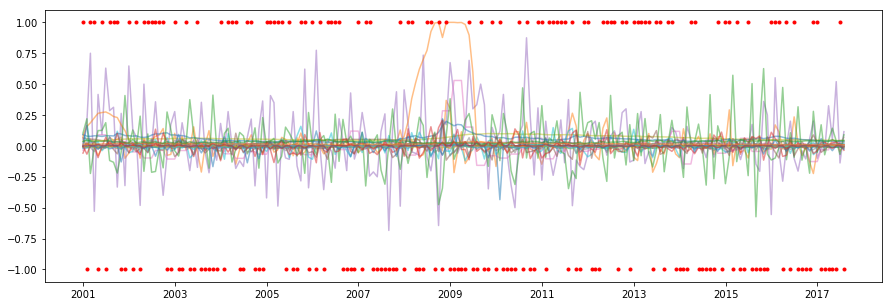

In [32]:
plt.figure(figsize = (15,5))
plt.plot(x,alpha=0.5)
plt.plot(2*(y-0.5),'r.')
plt.show()

In [44]:
stock_data_dir = '/home/luke/workspace/Sector-Analysis/data/CFRM521_final_project/'
name_to_sector = pd.read_excel(stock_data_dir+'INDUSTRY_SECTOR.xlsx',1)
name_to_sector.index = name_to_sector.iloc[:,0]
name_to_sector = name_to_sector.iloc[:,[1]]
name_to_sector.columns = ['Sector']

In [45]:
financial_large_cap = name_to_sector[name_to_sector.values=='Financial']
financial_large_cap.head()

,Sector
INDUSTRY_SECTOR,
AXP UN Equity,Financial
JPM UN Equity,Financial
EXR UN Equity,Financial
BAC UN Equity,Financial
BHF UW Equity,Financial


In [ ]:
financial_large_cap.to_csv("fin)")

In [92]:
# px_last = pd.read_excel(stock_data_dir+'PX_LAST.xlsx',1)
# px_last.head()

In [93]:
# fin_lc_price = px_last[px_last['PX_LAST'].isin(financial_large_cap.index)]
# fin_lc_price = fin_lc_price.T
# fin_lc_price.columns = fin_lc_price.iloc[0,:].values
# fin_lc_price = fin_lc_price.iloc[1:,:]
# dt_index = map(str,fin_lc_price.index)
# fin_lc_price = fin_lc_price.loc[[False if 'Unnamed' in index else True for index in dt_index]]
# fin_lc_price.index = pd.DatetimeIndex(fin_lc_price.index)
# fin_lc_price = fin_lc_price.iloc[1:,:]